# Import Required Libraries
Import necessary libraries such as pandas, matplotlib, and seaborn.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data from Excel Files
Load data from the two Excel files using pandas' read_excel function.

In [12]:
# Load data
ratings_path = 'ratings.xlsx'
users_path = 'users .xlsx'

# Read data
ratings_df = pd.read_excel(ratings_path)
users_df = pd.read_excel(users_path)

# Data Preprocessing
Clean and preprocess the data to make it suitable for visualization.

In [13]:
# Create synthetic 'rating' data for demonstration if not present
if 'rating' not in ratings_df.columns:
    ratings_df['rating'] = np.random.randint(1, 6, size=len(ratings_df))

# Merge ratings and users data on 'id'
merged_df = pd.merge(ratings_df, users_df, on="id", how="left")
# Sort age groups for logical order
age_order = ["Dưới 18 tuổi", "18-24", "25-34", "35-44", "45-49", "50-55", "56 tuổi trở lên"]
merged_df['age'] = pd.Categorical(merged_df['age'], categories=age_order, ordered=True)

# Pie Chart: Gender Movie Watching Trend
Create a pie chart to show which gender watches movies more frequently.

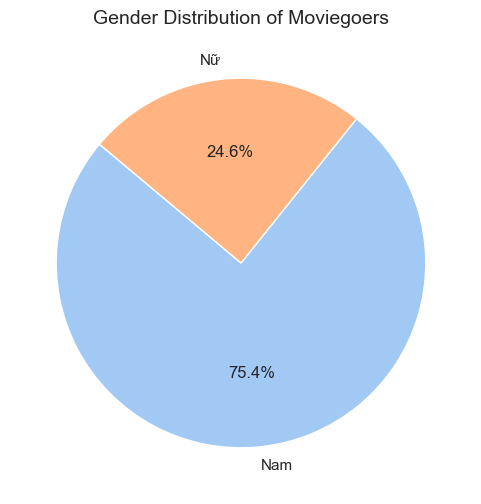

In [14]:
# 1. Pie Chart: Gender Distribution
gender_counts = merged_df['gender'].value_counts()
plt.figure(figsize=(6, 6))
colors = sns.color_palette("pastel")[:len(gender_counts)]
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Gender Distribution of Moviegoers", fontsize=14)
plt.show()

# Line Chart: Movie Ratings by Occupation or Age
Create a line chart to show movie ratings (from 1 to 5 stars) based on occupation or age.

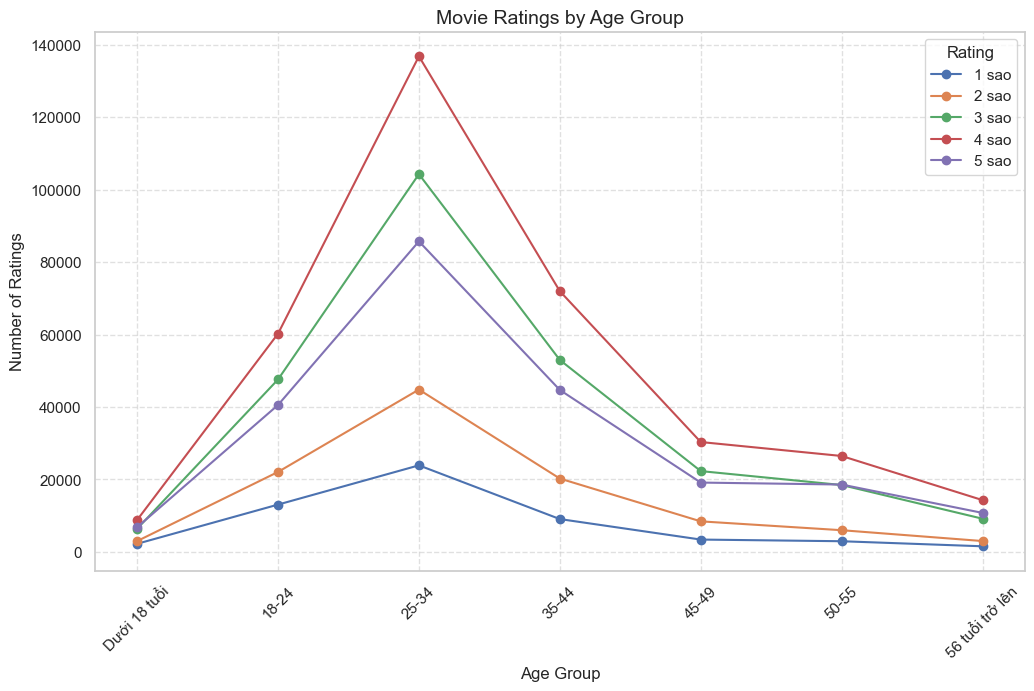

In [18]:
# 2. Line Chart: Ratings by Age Group
ratings_by_age = merged_df.groupby(['age', 'rating']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 7))
for rating in ratings_by_age.columns:
    plt.plot(ratings_by_age.index, ratings_by_age[rating], label=f'{rating} sao', marker='o')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.title("Movie Ratings by Age Group", fontsize=14)
plt.legend(title="Rating", loc="upper right")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.show()

# Bar Chart: Age Group Movie Watching Frequency
Create a bar chart to show which age group watches movies the most.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9728\1919590078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")


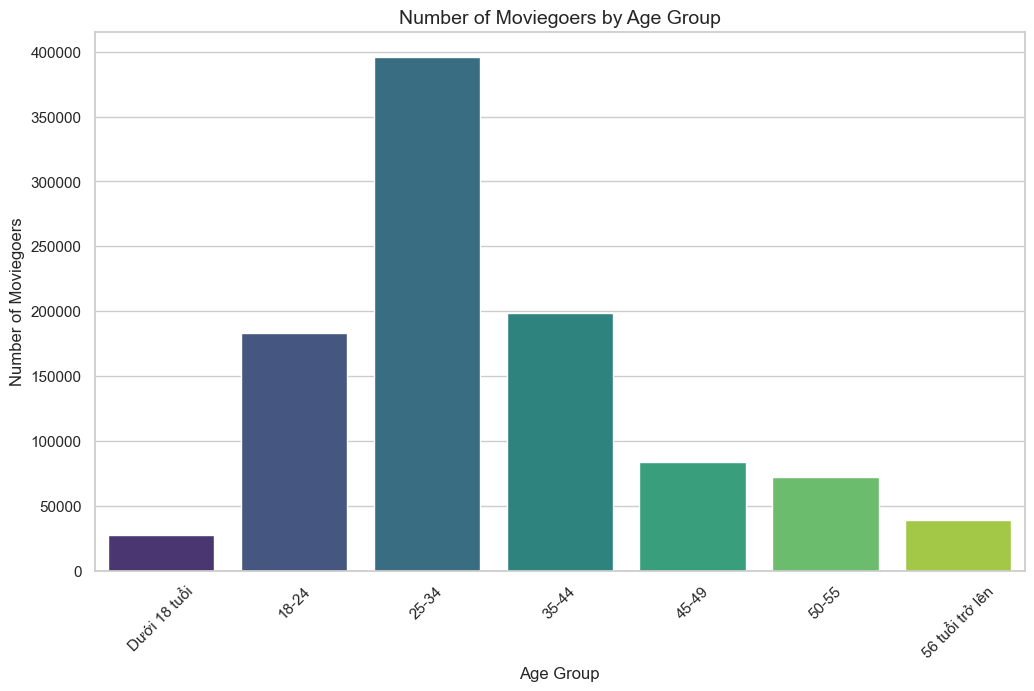

In [16]:
# 3. Bar Chart: Moviegoers by Age Group
age_counts = merged_df['age'].value_counts().sort_index()
plt.figure(figsize=(12, 7))
sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Moviegoers", fontsize=12)
plt.title("Number of Moviegoers by Age Group", fontsize=14)
plt.xticks(rotation=45)
plt.show()